# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

Please, if you are not able to see some plots, in here there is the link to see the notebook well formated and already run, please go to: https://drive.google.com/file/d/1te2e3ELh2pjGFHpgyHgRy0HctN4GS9Zg/view?usp=sharing

In google colab it's possible to see the table of contents and then also better have an idea of the notebook structure.

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

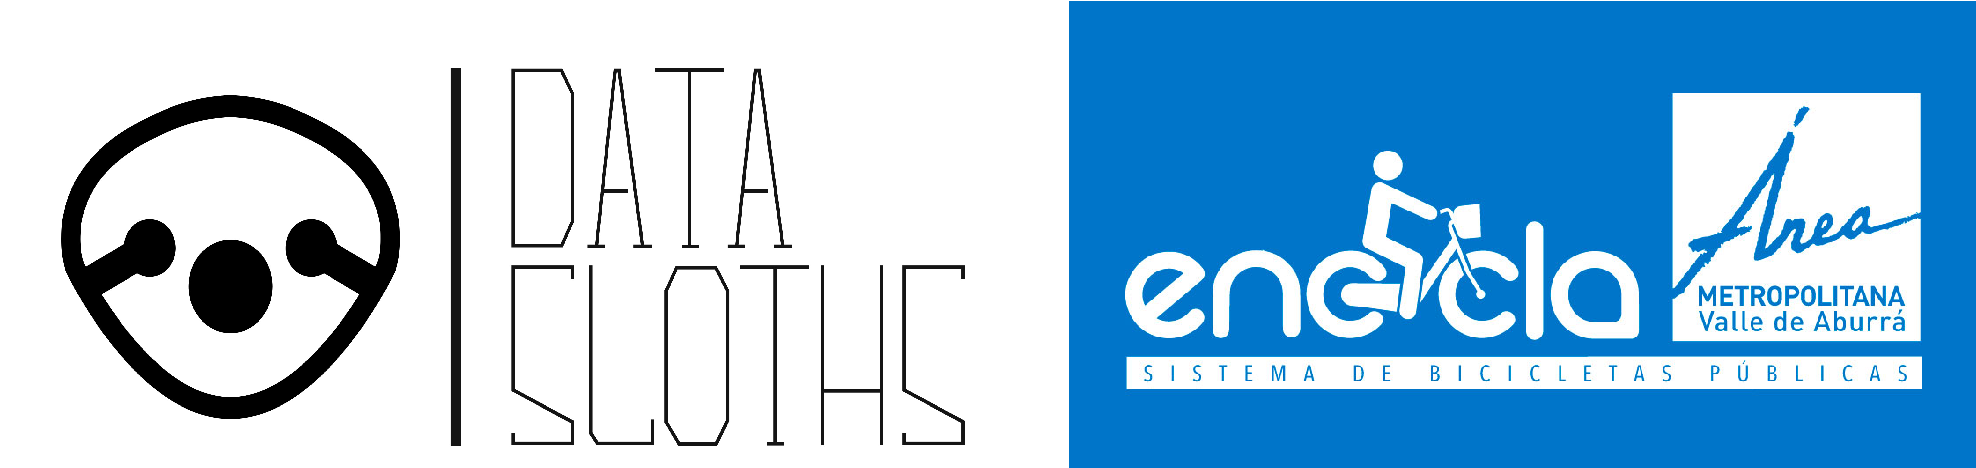

### Executive Summary

**Clarification: check outs -> bike is returned, check ins -> bike is borrowed**

We have 107 stations, mainly in Medellin followed by Sabadoneta, Envigado and Itagui; 85 are automatic stations, mainly with 40 as max capacity and 22 manual ones.

We noticed some incoherence in the check-out dates and some total rental duration were extremely high, e.g. over several months. There were also some duplicate bike rental IDs. These inconsistencies were removed as a part of the data cleansing process.

After the cleaning, the total rental duration has the median of 14 minutes. 20 stations acounts for more than 50% of the total check-ins (borrows), and similarly 20 stations accounts for more than 50% of the total check-outs (returns). The following 5 stations are the most popular for both checkins and checkouts: 
* Estadio - manual (id8)
* Suramericana - manual (id7)
* Floresta - manual (id12) 
* Ruta N - automatic (id3) 
* Universidad - manual (id2)

We observed some other intersting patterns:
* Robledo - manual (id13) has significantly more check ins than checkouts. 
* Not surprisingly, Covid has impacted the number of loans. There was a systematic increase in the number of loans until 2020 that arrives on average around 15k daily loans. Now the average is around 7,5K daily loans. Peaks of the check ins at 7am and at 5pm. In January-December and April-May-June there are low peaks of check ins maybe due to the holidays period.


**The objective of this challenge is to find a way to balance the availibity of bikes and parking slots in the bike sharing system.** We divide this problem in two steps:

**Step 1)** Predict the difference between check-ins and check-outs in the station

We start by identifying stations with the highest number of observations. We applied SARIMAX, using historical values, and separately applied machine learning models (random forest), using other features such as weather. We considered the loans from 2020-09-01 to 2021-12-03 (train 70%) and tested (30%) to evaluate the performance, comparing the r2 and mean absolute error metrics.

Note - we impute 0 in the time where we don’t observe check ins-checkouts (night and sunday), we consider for each station the number of checkins-checkouts hourly. 

For the weather data - we used the actual weather but in the future we will use the forecasting

**Step 2)** Understand when we have too many check-ins or too many check-outs

**Step3)** Visualizing the problematic stations, we propose a set of movements of bikes between the stations that would solve the problem

At the end, we show a map that allows us to understand the problematic stations and thus take balancing actions.

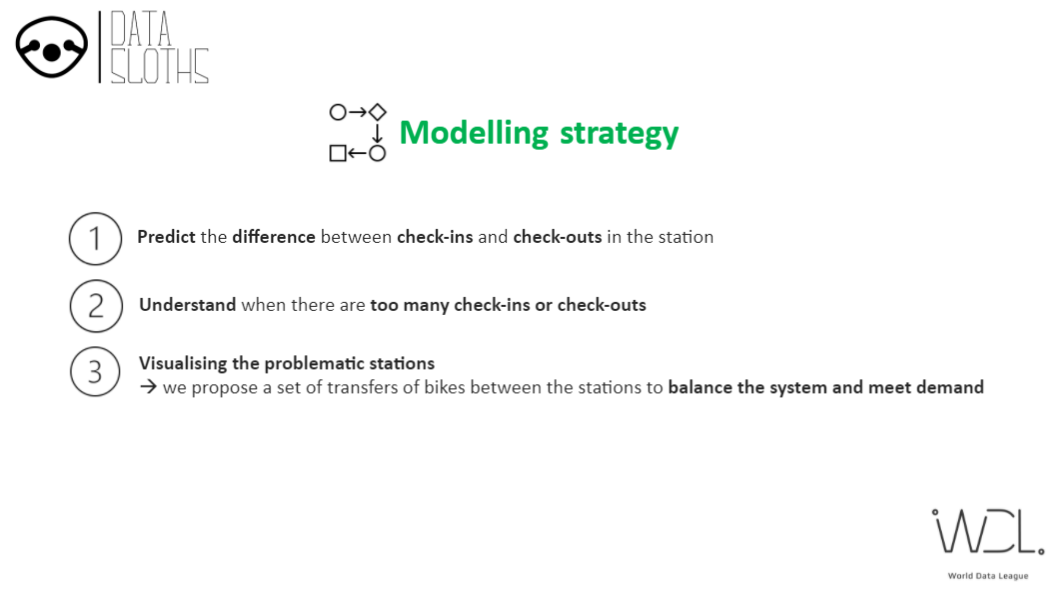

### Information from the challenge description - recap
**Public Bicycle System of the Aburrá Valley – EnCicla**

It currently has more than 1,600 bicycles in 101 stations, from which an average daily of
7,600 loans are made during the pandemic.

System stations can be manual or automatic. In the manuals, a person is responsible for
lending and receiving the bicycles to each user. In contrast, in the automatic ones, there
are a limited number of anchor points from which the bikes can be loaned and to which
you have to hook the bike that you want to return. If a user returns their bike and does not
have empty anchor points, you will have to move to another station or wait for another
user to release the anchor point.

**Problem:** One of the main challenges that the system has is to keep bicycles available by the time
the user approaches the station to make a loan and have anchor points available for the
moment the user wants to deliver the borrowed bike.

**Goal:** Have a model that allows us to make system load balancing decisions based on demand
forecasting based on historical data. Load balancing means the planning of transporting
bicycles from one station to another.

**Outcome** A model that indicates the optimal movement of bicycles to be made between stations,
and at what times or frequencies, to ensure that you perform the best system planning.

**Data**

Loans: The bike loans from 2014 until 2021

Stations: Location of the station

Digital Terrain Model: Contains the elevation of the city

Public Transportation Stations: Location of each station

Metro Map: The metro map of the city


### Useful information to understand the story of Encicla, the area and the challenges

[Addition information about EnCicle from this article of May 6, 2019]( https://medellinguru.com/encicla/?__cf_chl_jschl_tk__=f3e93f3feee8e5421870169b09d814206cecfdd6-1620460492-0-ASXv7tGFaL0Kg_W6Ft3la-XO86Hky_rqb6VY0TOng0p-uZgtqUiG9sYGPaMl2SKuav7HlxZGEuLGuu6IZA9XVjLJygmTIl6vGafutsR5SeuNx56dgC-ZkpfDFNcwJY702UlNcEQTXUzxEAhh0IkHgoQAZHT0Kwns72jO5z4FHIRMhDhDt8iHfbJRG5GOmzl9OIPME7QbdIBOZPvgbedRdPNa69DbdFr98PNdVUYgflFYkiruXUa9boHl36UTenslxzj4lVu_NcZ4VF7zH65CWR_UAiMq6AHt7r7u3i-WJP8RhzWrC0N0vXUUSF9wp6jW_GI8hAueZllQuMdXbO_6BzkaFVmk7qx9_-tJCIxtu1F_YUgLZ5aOlGE9LOEddVBSsURuze-uh1U84xRsXyWIdyw )

- in 2011 the Metropolitan Area of the Aburrá Valley began a pilot test, with six stations and 105 bicycles

- about 33 percent of the Encicla stations are located near Medellín Metro stations

- 2019 Major Expansion of Encicla: more bycicles as well as more stations

- use for up to an hour at a time, possibility torenew the loan of your bike for another hour at any Encicla station

- penalities in the case you use more than 1 hour!

- there are two types of stations for borrowing bikes: automatic (32 stations) and manual (19 stations)

- if you sign up as a visitor, access is granted to the Encicla system is only good for eight days and you will have to go to the Encicla office to renew

- this city bike lending system is open Monday to Friday 5:30 am to 10:00 pm, with the last bike loans at 9:00 pm

[Additional information directly from the site](https://encicla.metropol.gov.co/)

- Lunes a viernes: 5:30 a.m. a 10:00 p.m., ultimo préstamo: 9:00 p.m

- Sábado: 6:30 a.m. a 9:00 p.m.

- Estaciones con Horario Especial: Robledo

[More about Medelilin and encicla](https://use.metropolis.org/case-studies/encicla----sustainable-mobility-program)
- The Aburrá Valley is the natural basin of the Medellín River and one of the most populated valleys of Colombia and the Andean Region. It occupies an area of ​​1157 km2, with a population of 3,821,797 inhabitants

- One of the key objectives of the Master Plan is: achieve 10% of the total number of journeys carried out in the Aburrá Valley by bicycle

- the EnCicla public bicycle system will be implemented in the 10 municipalities

- During 6 years of operation, EnCicla has had approximately 58,000 active users **(76% male and 24% female)** who have travelled a distance in kilometers, that is equivalent to 400 round-the-world tours. Initially, **73% of the users were students**, however, with the expansion of EnCicla to the downtown area, the user's profile has changed to include workers, and other members of **the general public who now represent 42% of users of the system**. This demonstrates that bicycle transportation is not only a viable option for students and young people, but also for professionals an older people

-  **According to measurement indicators, when a citizen moves in car, it emits between 220 and 250 grams of dioxide of carbon into the atmosphere per kilometer travelled, while biking, it emits 16 grams in the same distance** (could be helpful to estimate the impact)

- **Barriers and challenges:**
According to the **2012** household survey of origin and destination in the Aburrá Valley, 5.6 million travel journeys are made daily, **74% are motorized and 26% are non-motorized**. Motorized trips are distributed in: private (35%), groups (39%), mass (12%), individual (10%) and other (4%). There is evidence that 86% of trips are to, from or within Medellín. At the same time, 68% of the total number of trips are to go to work (44%) school (24%), followed by shopping (4%), health (4%), recreation (3%), inquiries (8%) and other (13%).

  Communities of El Poblado, laureles, and Belen makeup 44% OF THE cars on the road and if you include Envigado, 57% of cars in Valley of Aburrá are located in less than 20% of the population of the region. Additionaly, the increase in vehicles shows an increase in travel time created by traffic congestion. In 2005 the average Journey time was 25 minutes and in 2012 it was 33 minutes, which means an increase of 30%. 75% of those trips are to the city of Medellin, and mainly, the center of that city.

  As well as the increase in journey times and traffic congestion, other negative impacts of automobile travels are evident in the increase in pollutant emissions, health related issues, and stress.

  Currently, **there are approximately 4.2 million tons of CO2 per year generated in the Aburrá Valley, of which 70% correspond to motorized transport of people and goods, making this the sector with the laargest pollutant emissions to the atmosphere in the Aburrá Valley**. If this continues, the projections for the year 2030 estimate a generation of 8.4 million tons of CO2, and the transport sector would contribute 74.6%. It has been estimated that the economic costs of the externalities caused by the air pollution, time lost in traffic congestion and accidents are equivalent to 3.8% of the gross domestic product of the region.

- It has been proven in corridors such as San Juan (the first **secure corridor** for pedestrians and cyclists between the east and west side of the city) that with safe and inclusive infrastructure the level of participation of **EnCicla can increase up to 1000%**.

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

To keep the notebook readable, we decided to divide the Development in the following macro sections:

- Packages
- Load data
- Exploratory data analysis
- Clean the data
- Prepare the data for modeling
- Models
- Plot to understand balance


#### Packages

In [1]:
!pip install plotly==4.14.3

In [2]:
!pip install pmdarima

In [3]:
!pip install geopandas

In [4]:
!pip install Pipeline

In [5]:
!pip install workalendar

In [6]:
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
import os
import re
import time
import requests
import json
from datetime import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
from sklearn.model_selection import TimeSeriesSplit
from tqdm.notebook import tqdm
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
from workalendar.america import Colombia
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

####  LOAD DATA: Functions

In [7]:
#for weather load
def kelvin_to_celsius(f):
  temp = float(f)
  celsius = (temp - 273.15)
  return celsius
  
#for weather load
def create_weather_df(hist_weather_json):
  weather_ls = []
  for ls in hist_weather_json['list']:
    unixts = int(ls['dt'])
    dt = datetime.utcfromtimestamp(unixts).strftime('%Y-%m-%d %H:%M:%S')
    main = ls['main']
    main_vals = main.values()
    weather = ls['weather'][0]
    weather_vals = list(weather.values())
    wind = ls['wind'] 
    wind_vals = list(wind.values())

    clouds = ls['clouds'] 
    clouds_vals = list(clouds.values())

    weather_ls.append([dt]+list(main_vals)+weather_vals+wind_vals+clouds_vals)
  cols = ['datetime']+list(main.keys())+list(weather.keys())+list(wind.keys())+['clouds']
  hist_weather = pd.DataFrame(weather_ls, columns = cols)
  #convert to fahrenheit
  fahrenheit_cols = ['temp','feels_like','temp_min','temp_max']
  for c in fahrenheit_cols:
    hist_weather[c] = hist_weather[c].apply(kelvin_to_celsius)
  return hist_weather

  #pre-processing the data and set the type to optimize memory for ML method
def set_date_features(df,dtcol='Date'):
    df['hour'] = df[dtcol].dt.hour.astype("int16")
    df['weekday'] = df[dtcol].dt.strftime('%A')
    df['day_of_week'] = df[dtcol].dt.dayofweek.astype("int16")
    df['month'] = df[dtcol].dt.month.astype("int16")
    df['year'] = df[dtcol].dt.year.astype("int16")
    cal = Colombia()
    df['holiday'] = df[dtcol].apply(lambda x: int(cal.is_working_day(pd.to_datetime(str(x))))).astype("int16")
    df['is_weekend'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(int).astype("int16")
    return df

def preprocess_ML(train_df, X_cols_cat,X_cols_cont, y_col,remove_closed_hours =False):
    X_cols = X_cols_cat + X_cols_cont
    train_df.sort_index(inplace=True)
    train_df.reset_index(inplace=True)
    train_df = set_date_features(train_df)
    if remove_closed_hours:
      train_df = train_df[(train_df.hour.isin(list(range(5,23)))) & (train_df.weekday!='Sunday')]
    train_df.set_index('Date',inplace=True)
    train_df = train_df[X_cols+[y_col]]
    train_df = pd.get_dummies(train_df, columns=X_cols_cat, drop_first=True)
    return train_df

def train_test_split(df, y_col, model_type, splitval = 0.7):
    xtr_idx = int(df.shape[0] * splitval)
    if (model_type != 'sarimax' and model_type != 'sarimax_multiple_one_step'):
        d_X_cols = list(set(df.columns) - set([y_col]))
    else:
        d_X_cols = df.columns
        y_col = df.columns

    X_train= df.iloc[:xtr_idx][d_X_cols]
    y_train= df.iloc[:xtr_idx][y_col]

    X_test = df.iloc[xtr_idx:][d_X_cols]
    y_test = df.iloc[xtr_idx:][y_col]

    dts = df.index

    train_dts = dts[:xtr_idx]
    test_dts = dts[xtr_idx:]

    return X_train, X_test, y_train, y_test, train_dts, test_dts



####  LOAD DATA: station_location_with_id.csv

In [8]:
#@title
df_bikestations_withids=pd.read_csv("https://wdl-data.fra1.digitaloceanspaces.com/medellin/station_location_with_id.csv", sep=";")
df_bikestations_withids['Lat']=df_bikestations_withids['Lat'].apply(lambda x: x.replace(",","."))
df_bikestations_withids['Lon']=df_bikestations_withids['Lon'].apply(lambda x: x.replace(",","."))

df_bikestations_withids_gdf = gpd.GeoDataFrame(
    df_bikestations_withids, geometry=gpd.points_from_xy(df_bikestations_withids.Lon, df_bikestations_withids.Lat))
df_bikestations_withids_gdf['lon'] = df_bikestations_withids_gdf.geometry.x
df_bikestations_withids_gdf['lat'] = df_bikestations_withids_gdf.geometry.y

df_bikestations_withids_gdf.info()
print("This is how the dataset looks like:")
display(df_bikestations_withids_gdf.head())

print("sum numSlots", df_bikestations_withids_gdf.numSlots.sum())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              107 non-null    int64   
 1   Description     107 non-null    object  
 2   numSlots        107 non-null    int64   
 3   shortName       106 non-null    object  
 4   Lat             107 non-null    object  
 5   Lon             107 non-null    object  
 6   isManual        107 non-null    int64   
 7   webDescription  88 non-null     object  
 8   photo           65 non-null     object  
 9   geometry        107 non-null    geometry
 10  lon             107 non-null    float64 
 11  lat             107 non-null    float64 
dtypes: float64(2), geometry(1), int64(3), object(6)
memory usage: 10.2+ KB
This is how the dataset looks like:


ID           Description  ...        lon       lat
0   1               Moravia  ... -75.564804  6.276585
1   2           Universidad  ... -75.565300  6.269267
2   3                Ruta N  ... -75.566348  6.265182
3   4            Punto Cero  ... -75.575066  6.265161
4   5  Universidad Nacional  ... -75.578812  6.259663

[5 rows x 12 columns]

sum numSlots 3378


#### EDA: station IDs location and numslots

Dataset where we can find the IDs of the stations, their localizations and the info if it is manual or automatic. **We have 107 bike stations** and 3 378 slots in total.

In [9]:
#@title
fig = px.scatter_mapbox(df_bikestations_withids_gdf, lat="lat", lon="lon", center={'lon':-75.58,'lat':6.23},zoom=11, text='Description',color="isManual",color_continuous_scale=px.colors.sequential.Bluered)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In the figure above we can see the localization of the stations, the red are the manual ones and the blue are the automatic ones.
There are four clusters: the biggest one in the city centre of Medellin, one in Sabaneta, one in Envigado and one in Itagui.

In [10]:
#@title
display(pd.crosstab(df_bikestations_withids_gdf['isManual'],df_bikestations_withids_gdf['numSlots'], dropna=False, margins=True))

numSlots  1  9  10  12  14  15  18  20  21  ...  34  36  38  40  44  48  52  56  All
isManual                                    ...                                     
0         0  0   0   0   2   0   2   9   0  ...   1   7   3  26   4   3   3   3   85
1         2  1   1   2   0   1   0   5   3  ...   0   0   0   1   0   0   0   0   22
All       2  1   1   2   2   1   2  14   3  ...   1   7   3  27   4   3   3   3  107

[3 rows x 26 columns]

We have **85 automatic stations** and **22 manual ones**.

In [11]:
#@title
fig = px.bar(df_bikestations_withids, x='ID', y='numSlots', color="isManual", color_continuous_scale=px.colors.sequential.Bluered)
fig.update_xaxes(type='category')
fig.show()

In the figure above we can see for each station which is its **capacity**. It seems that also the manual ones have limited capacity, but we know from Encicla that the manual ones don't have capacity limitations. 26 automatic stations has 40 as capacity.

####  LOAD DATA: External data - weather

**Weather has a major impact on people commuting behaviour especially when using bikes**. Including weather data for out preditcion should make a significant difference as we expect more people using a bike on sunny and warm day than in cold or rainy weather.


In [12]:
#@title
#load in weather data to include as exogenous
api_key = "4a4027677a29ff7f2fd7c439ad85efe0"
city = "Medellin"
countrycode = "CO"
unix_oneday = 86400
end = int(time.time()) #now
start = end - (364 * unix_oneday) #last 12 months

#can only load 7 days at once (use 5 below)
unix_days = unix_oneday * 5
iterations = int((end-start) / (unix_days))

#reset end
end = start + unix_days
hist_df_ls = [] 
for i in range(iterations):
  his_url = "http://history.openweathermap.org/data/2.5/history/city?q=%s,%s&start=%s&end=%s&appid=%s" % (city,countrycode,start,end,api_key)
  response = requests.get(his_url)
  hist_weather_json = json.loads(response.text)
 # b = True
 # while b:
#try:
  hist_weather_df = create_weather_df(hist_weather_json)
  b = False
#except:
#    pass
  
  hist_df_ls.append(hist_weather_df)
  start += unix_days
  end += unix_days

hist_weather_df = pd.concat(hist_df_ls)
hist_weather_df.drop_duplicates()
print("historical weather data examples")
display(hist_weather_df.head(3))

# load weather forecast
for_url = 'http://pro.openweathermap.org/data/2.5/forecast/hourly?q=%s&appid=%s' % (city,api_key)
response = requests.get(for_url)
weather_forecast_json = json.loads(response.text)
forecast_weather_df = create_weather_df(weather_forecast_json)
print("new forecasting data examples")
display(forecast_weather_df.head(3))

historical weather data examples


datetime   temp  feels_like  pressure  ...  icon  speed  deg  clouds
0  2020-05-16 12:00:00  14.20       14.06      1026  ...   04d   2.10  230      75
1  2020-05-16 13:00:00  15.97       16.98      1026  ...   04d   0.78  110      75
2  2020-05-16 14:00:00  19.83       21.32      1021  ...   04d   0.64  126     100

[3 rows x 14 columns]

new forecasting data examples


datetime   temp  feels_like  temp_min  ...  speed  deg  gust  clouds
0  2021-05-15 12:00:00  16.69       16.90     16.69  ...   0.93   75  1.71      92
1  2021-05-15 13:00:00  17.90       18.12     17.90  ...   0.84   89  1.72      94
2  2021-05-15 14:00:00  20.41       20.57     20.41  ...   0.66   82  1.36      92

[3 rows x 18 columns]

####  LOAD DATA: data_dict.csv

In [13]:
#@title
pd.set_option('max_colwidth', 2000)
pd.read_csv("https://wdl-data.fra1.digitaloceanspaces.com/medellin/data_dict.csv",sep=";",usecols=['Field Name','Description'])

Field Name                                                              Description
0     Id_Historico_Prestamo                                                                  Loan ID
1                Id_Usuario                                                                  User ID
2          Id_Tag_Bicicleta  Tag ID of the bike. The same bike can have multiple tags over the year.
3            Fecha_Prestamo                                                     Loan start date/time
4          Fecha_Devolucion                                                      Loan stop date/time
5   Id_Aparcamiento_Origen                                                    ID of the loan station
6   Id_Aparcamiento_Destino                            ID of the station where the bike was returned
7           Posicion_Origen                               Position number of the bike in the station
8                   Importe                                       Cost of the local (not applicable)
9       Descripcion Importe                                 Description of the cost (not applicable)
10                 operario                           If it is a manual station, who was the worker.
11            Num_Bici_Hist                                                           Not applicable

We'll ignore the Importe, Descripcion Importe and Num_Bici_Hist variables since are not applicable.

####  LOAD DATA: bike_loans.zip


Since it is a zip and the csv has the historical of the loans from 2014, it takes a bit to load.

In [14]:
#@title
resp = urlopen("https://wdl-data.fra1.digitaloceanspaces.com/medellin/bike_loans.zip")
zipfile = ZipFile(BytesIO(resp.read()))
df_bike=pd.read_csv(zipfile.open('bike_loans.csv'), sep=";", usecols=['Id_Historico_Prestamo', 'Id_Usuario', 'Id_Tag_Bicicleta',
       'Fecha_Prestamo', 'Fecha_Devolucion', 'Id_Aparcamiento_Origen',
       'Posicion_Origen', 'Id_Aparcamiento_Destino', 'Posicion_Destino','operario'])
df_bike['Fecha_Prestamo']=pd.to_datetime(df_bike['Fecha_Prestamo'])
df_bike['Fecha_Devolucion']=pd.to_datetime(df_bike['Fecha_Devolucion'])

df_bike['Fecha_Devolucion_year']=df_bike['Fecha_Devolucion'].dt.year

df_bike['Fecha_Prestamo_month']=df_bike['Fecha_Prestamo'].dt.month
df_bike['Fecha_Prestamo_day']=df_bike['Fecha_Prestamo'].dt.day
df_bike['Fecha_Prestamo_year']=df_bike['Fecha_Prestamo'].dt.year
df_bike['Fecha_Prestamo_hour']=df_bike['Fecha_Prestamo'].dt.hour
df_bike['Fecha_Prestamo_dayofweek']=df_bike['Fecha_Prestamo'].dt.day_name()

df_bike['duration_minutes']=round((df_bike['Fecha_Devolucion'] - df_bike['Fecha_Prestamo']).dt.total_seconds()/60,2)
df_bike['diffyear_devolucion_prestamo']=round(df_bike['Fecha_Devolucion_year'] - df_bike['Fecha_Prestamo_year'],2)
display(df_bike.head())

Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
0                6501462  ...                             0
1                6501318  ...                             0
2                6501489  ...                             0
3                6501001  ...                             0
4                6501421  ...                             0

[5 rows x 18 columns]

In [15]:
#@title
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225355 entries, 0 to 14225354
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Id_Historico_Prestamo         int64         
 1   Id_Usuario                    int64         
 2   Id_Tag_Bicicleta              object        
 3   Fecha_Prestamo                datetime64[ns]
 4   Fecha_Devolucion              datetime64[ns]
 5   Id_Aparcamiento_Origen        int64         
 6   Posicion_Origen               int64         
 7   Id_Aparcamiento_Destino       float64       
 8   Posicion_Destino              float64       
 9   operario                      object        
 10  Fecha_Devolucion_year         int64         
 11  Fecha_Prestamo_month          int64         
 12  Fecha_Prestamo_day            int64         
 13  Fecha_Prestamo_year           int64         
 14  Fecha_Prestamo_hour           int64         
 15  Fecha_Prestamo_dayofweek      

We have 14 225 355 bike loans, let's start a explorative data analysis.

#### EDA: check-in, check-out dates and total duration

In [16]:
df_bike.Fecha_Prestamo.describe(datetime_is_numeric=True)

count                         14225355
mean     2018-06-22 07:29:56.744051968
min                2014-05-30 15:41:33
25%                2017-04-08 10:43:17
50%                2018-09-07 19:17:32
75%                2019-09-19 08:58:29
max                2021-04-20 19:53:17
Name: Fecha_Prestamo, dtype: object

In [17]:
df_bike.Fecha_Devolucion.describe(datetime_is_numeric=True)

count                         14225355
mean     2018-06-22 05:57:06.669793024
min                2008-01-01 00:04:01
25%                2017-04-08 10:13:49
50%                2018-09-07 19:20:19
75%         2019-09-19 09:07:45.500000
max                2021-04-21 05:19:08
Name: Fecha_Devolucion, dtype: object

This is weird: we have the minimum date of check-out that is 2008 when also in the challenge description and as we can see in the check-in date is 2014. Maybe is there a error of the system? Let's investigate.

In [18]:
#@title
print("How many loans we have that have the duration time more than 1 year? we have: ", len(df_bike[df_bike['diffyear_devolucion_prestamo']>1]))
print("Here some examples:")
display(df_bike[df_bike['diffyear_devolucion_prestamo']>1].head())

How many loans we have that have the duration time more than 1 year? we have:  378
Here some examples:


Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
3947                 6427319  ...                             3
14626                6428377  ...                             3
30784                4334757  ...                             2
34577                6435102  ...                             3
36163                5071248  ...                             2

[5 rows x 18 columns]

In [19]:
#@title
print("How many stations have checkins date after their checkout dates(errors)!!? we have: ", len(df_bike[df_bike['diffyear_devolucion_prestamo']<0]))
print("Here some examples:")
display(df_bike[df_bike['diffyear_devolucion_prestamo']<0].head())

How many stations have checkins date after their checkout dates(errors)!!? we have:  1269
Here some examples:


Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
11690                5057997  ...                            -2
11691                5057859  ...                            -2
12210                5058345  ...                            -2
15580                6502604  ...                            -4
16021                4337048  ...                            -2

[5 rows x 18 columns]

There some incoherencies between the date of check-ins and check-outs, then let's also investigate the duration in minutes.

In [20]:
#@title
pd.set_option('float_format', '{:f}'.format)
display(df_bike.duration_minutes.describe())

count   14225355.000000
mean         -92.834579
std        19792.991641
min     -6241688.730000
25%            7.880000
50%           13.850000
75%           23.880000
max      2002989.450000
Name: duration_minutes, dtype: float64

We were expecting to see the total duration in minutes around the hour, since it is the max free time that a person can use the bike, but we have a median of almost 14 minutes. Maybe we can see better the total duration in minutes after we delete the various errors.

The minimum and the max values are for sure some system errors:

In [21]:
display(df_bike[df_bike['duration_minutes']==df_bike.duration_minutes.min()])

Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
13428924               16418556  ...                           -11

[1 rows x 18 columns]

In [22]:
display(df_bike[df_bike['duration_minutes']==df_bike.duration_minutes.max()])

Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
7503034               10033183  ...                             4

[1 rows x 18 columns]

In [23]:
#@title
print("How many loans we have that have the duration minutes less than 0 minutes? we have: ", len(df_bike[df_bike['duration_minutes']<0]))
print("Here some examples:")
display(df_bike[df_bike['duration_minutes']<0].head())

less_than0minutes=df_bike[df_bike['duration_minutes']<0]
fig = px.box(less_than0minutes, y="duration_minutes")
fig.show()

How many loans we have that have the duration minutes less than 0 minutes? we have:  3858
Here some examples:


Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
479                  6501980  ...                             0
522                  6501844  ...                             0
11690                5057997  ...                            -2
11691                5057859  ...                            -2
12210                5058345  ...                            -2

[5 rows x 18 columns]

We believe that also these are system errors or data storage problems.

In [24]:
#@title
print("How many loans we have that have the duration minutes more than 1 day? we have: ", len(df_bike[df_bike['duration_minutes']>=(24*60)]))
print("Here some examples:")
display(df_bike[df_bike['duration_minutes']>=(24*60)].head())

morethan_1day=df_bike[df_bike['duration_minutes']>=(24*60)].head()

fig = px.box(morethan_1day, y="duration_minutes")
fig.show()

How many loans we have that have the duration minutes more than 1 day? we have:  2073
Here some examples:


Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
3383                 6491937  ...                             0
3947                 6427319  ...                             3
14626                6428377  ...                             3
30784                4334757  ...                             2
34577                6435102  ...                             3

[5 rows x 18 columns]

Seems that also when it is more than 1 day, there is a system or data storage problems.

We think that it's best to delete these observations.

In [25]:
#@title
df_bike_1=df_bike[(df_bike['duration_minutes']>0) & df_bike['duration_minutes']<=(24*60)]
print("we will delete then", round(len(df_bike_1)/len(df_bike),2), "percentage in the initial number of loans", len(df_bike),"because of duration problems")



we will delete then 1.0 percentage in the initial number of loans 14225355 because of duration problems


#### EDA: check if the stations we have in the loans are the ones we have in the station_location_with_id

In [26]:
#@title
print("these are the IDs that are in the bike loans in the origin IDs but we don't have in station_location_with_id.csv:")
prob_origin=list(set(df_bike.Id_Aparcamiento_Origen.unique()) - set(df_bikestations_withids_gdf.ID.unique()))
print(prob_origin)
print("we have this total number of loans with these IDs: ",len(df_bike[df_bike.Id_Aparcamiento_Origen.isin(prob_origin)]))
print(df_bike[df_bike.Id_Aparcamiento_Origen.isin(prob_origin)].groupby(['Id_Aparcamiento_Origen']).size().reset_index(name="Count per ID"))

these are the IDs that are in the bike loans in the origin IDs but we don't have in station_location_with_id.csv:
[14, 15, 16, 17, 18, 147, 149, 151, 25, 26, 31, 50, 52, 69, 71, 72, 73, 74, 75, 76, 83]
we have this total number of loans with these IDs:  59663
    Id_Aparcamiento_Origen  Count per ID
0                       14         11514
1                       15            34
2                       16          7470
3                       17          1093
4                       18           777
5                       25           154
6                       26             9
7                       31           214
8                       50         34650
9                       52             2
10                      69           445
11                      71           785
12                      72           379
13                      73            70
14                      74            26
15                      75             6
16                      76             4
17

In [27]:
#@title
print("we have missing values in IDs destination: ", df_bike.Id_Aparcamiento_Destino.isna().sum())
print("these are the IDs that are in the bike loans in the destination IDs but we don't have in station_location_with_id.csv:")
prob_dest=list(set(df_bike.Id_Aparcamiento_Destino.unique()) - set(df_bikestations_withids_gdf.ID.unique()))
print(prob_dest)
print("we have this total number of loans with these IDs: ",len(df_bike[df_bike.Id_Aparcamiento_Destino.isin(prob_dest)]))
print(df_bike[df_bike.Id_Aparcamiento_Destino.isin(prob_dest)].groupby(['Id_Aparcamiento_Destino']).size().reset_index(name="Count per ID"))

we have missing values in IDs destination:  6079
these are the IDs that are in the bike loans in the destination IDs but we don't have in station_location_with_id.csv:
[nan, 0.0, 14.0, 15.0, 16.0, 17.0, 18.0, 147.0, 149.0, 150.0, 151.0, 25.0, 26.0, 31.0, 50.0, 52.0, 69.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 120.0]
we have this total number of loans with these IDs:  101654
    Id_Aparcamiento_Destino  Count per ID
0                  0.000000           243
1                 14.000000          8205
2                 15.000000          1284
3                 16.000000         13217
4                 17.000000          2580
5                 18.000000          1224
6                 25.000000          1466
7                 26.000000             9
8                 31.000000           282
9                 50.000000         61115
10                52.000000             5
11                69.000000           445
12           

In [28]:
#@title
print("we will delete then: ",round(100*((6079+101654+59663)/len(df_bike)),2)," percentage considering the ", len(df_bike), "initial loans")

we will delete then:  1.18  percentage considering the  14225355 initial loans


#### EDA: missing values

In [29]:
df_bike.isna().sum()

Id_Historico_Prestamo                 0
Id_Usuario                            0
Id_Tag_Bicicleta                     11
Fecha_Prestamo                        0
Fecha_Devolucion                      0
Id_Aparcamiento_Origen                0
Posicion_Origen                       0
Id_Aparcamiento_Destino            6079
Posicion_Destino                 120292
operario                        7403705
Fecha_Devolucion_year                 0
Fecha_Prestamo_month                  0
Fecha_Prestamo_day                    0
Fecha_Prestamo_year                   0
Fecha_Prestamo_hour                   0
Fecha_Prestamo_dayofweek              0
duration_minutes                      0
diffyear_devolucion_prestamo          0
dtype: int64

We will not consider the ones that have missing values in Id_Tag_Bicicleta and in Id_Aparcamiento_Destino

#### EDA: duplicates

In [30]:
#@title
print("we have a initial number of loans of ",len(df_bike), " but n unique Id_Historico_Prestamo (id of the dataset) of: ",df_bike['Id_Historico_Prestamo'].nunique())

we have a initial number of loans of  14225355  but n unique Id_Historico_Prestamo (id of the dataset) of:  14221915


then we have duplicates and then let's analyse them
1.  duplicated (same row) -> remove and keep the first
2. same ID

Let's focus on duplicated (1.)

In [31]:
#@title
display(df_bike[df_bike.duplicated(keep=False)])
print(len(df_bike[df_bike.duplicated(keep=False)]))

Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
655361                  93767  ...                             0
655600                  93767  ...                             0
718192                 136617  ...                             0
718202                 136617  ...                             0
728165                 142832  ...                             0
728332                 142832  ...                             0
728341                 142567  ...                             0
728620                 142567  ...                             0
736538                 147598  ...                             0
736539                 147598  ...                             0
738429                 149398  ...                             0
738481                 149398  ...                             0
745004                 153696  ...                             0
745684                 153696  ...                             0
746845                 155199  ...                             0
747182                 155199  ...                             0
756647                 160019  ...                             0
756978                 160019  ...                             0
758043                 161733  ...                             0
758752                 161733  ...                             0

[20 rows x 18 columns]

20


Let's focus on ID loans duplicated (2.)

In [32]:
#@title
display(df_bike[df_bike.duplicated(subset=['Id_Historico_Prestamo'],keep=False)].sort_values(by=['Id_Historico_Prestamo']))

Id_Historico_Prestamo  ...  diffyear_devolucion_prestamo
506809                      141  ...                             0
507000                      141  ...                             0
507010                      259  ...                             0
507011                      259  ...                             0
506960                      331  ...                             0
...                         ...  ...                           ...
14199477               17245718  ...                             0
14210111               17253268  ...                             0
14210622               17253268  ...                             0
14215432               17260067  ...                             0
14215549               17260067  ...                             0

[6607 rows x 18 columns]

we don't know about the reason of these duplicates, let's remove them.

#### EDA: frequencies Usuario

In [33]:
df_bike['Id_Usuario'].nunique() 

93005

In [34]:
#@title
df_bike_cusario=df_bike['Id_Usuario'].value_counts().reset_index() # some usuario can be loyal to the bike sharing service :)
df_bike_cusario.columns = ['Id_Usuario','Count']
display(df_bike_cusario.head(20)) # top 20 usuarios

Id_Usuario  Count
0          621  11959
1        16700   8135
2        11761   7868
3        14191   7585
4        32259   7092
5        21640   7030
6        11051   6691
7        23891   6464
8        99185   6207
9        42854   5994
10       11695   5365
11       22181   5267
12       37360   5172
13       16607   5166
14       25823   5080
15      104620   5038
16       18438   4956
17         691   4944
18       40413   4917
19       11836   4692

#### EDA: frequencies Bicicleta

In [35]:
df_bike['Id_Tag_Bicicleta'].nunique()

6697

In [36]:
#@title
df_bike_cbici=df_bike['Id_Tag_Bicicleta'].value_counts().reset_index()
df_bike_cbici.columns = ['Id_Tag_Bicicleta','Count']
display(df_bike_cbici.head(20))

Id_Tag_Bicicleta  Count
0      000017AFC4CF  10227
1      000017B04C83  10213
2      000017B03061  10213
3      000017AFD5F6  10098
4      000017AFE936   9999
5      000017B0349B   9932
6      000017AFD2ED   9904
7      000017B0393B   9899
8      000017AFAD11   9887
9      000017B0065A   9868
10     0000164B64AC   9852
11     000017AFBB78   9844
12     0000164BFF9A   9827
13     000017B05105   9814
14     000017B043E2   9812
15     000017B02E8A   9801
16     000017B00B3E   9754
17     000017AFA4C1   9748
18     000017B04149   9742
19     000017AFD5C5   9742

are there new bycicles along the years?

showing the first year that the bike ID was used

In [37]:
#@title
display(df_bike.groupby('Id_Tag_Bicicleta').agg({'Fecha_Prestamo_year': 'min'}).head(20))
display(df_bike.groupby('Id_Tag_Bicicleta').agg({'Fecha_Prestamo_year': 'min'}).tail(20))

Fecha_Prestamo_year
Id_Tag_Bicicleta                     
0000                             2015
000000000000                     2015
00000032B0E2                     2020
0000003E4C1D                     2020
000000478CC7                     2020
00000052D0E2                     2020
0000005EDCE2                     2020
00000063E1E2                     2020
0000006AD4D3                     2020
0000006DEFE2                     2020
0000006FEDE2                     2020
0000007DFFE2                     2020
00000154D7E2                     2020
0000015A90C7                     2021
00000181F31C                     2020
0000020484E2                     2020
0000022F8DCD                     2020
000002458CC7                     2020
0000024ACAE2                     2020
0000024E87C7                     2020

Fecha_Prestamo_year
Id_Tag_Bicicleta                     
SA396                            2017
SA397                            2017
SA398                            2017
SA4                              2014
SA40                             2014
SA400                            2017
SA404                            2017
SA406                            2017
SA407                            2017
SA408                            2017
SA410                            2017
SA411                            2017
SA414                            2017
SA415                            2017
SA416                            2017
SA5                              2014
SA6                              2014
SA7                              2014
SA8                              2014
SA9                              2014

We can see there are older and recent bycicles.

#### EDA: frequencies origin and destination stations

In [38]:
df_bike['Id_Aparcamiento_Origen'].nunique()

128

In [39]:
#@title
df_bike_cidorigen=df_bike['Id_Aparcamiento_Origen'].value_counts().reset_index()
df_bike_cidorigen.columns = ['Id_Aparcamiento_Origen','Count']
df_bike_cidorigen['Perc']=round(100*(df_bike_cidorigen['Count']/len(df_bike)),2)
df_bike_cidorigen['Cum_percent'] = round(100*(df_bike_cidorigen.Count.cumsum() / df_bike_cidorigen.Count.sum()))
display(df_bike_cidorigen.head(20))

Id_Aparcamiento_Origen   Count     Perc  Cum_percent
0                        8  791863 5.570000     6.000000
1                        7  673281 4.730000    10.000000
2                       12  515569 3.620000    14.000000
3                        3  469246 3.300000    17.000000
4                        2  442668 3.110000    20.000000
5                       66  394525 2.770000    23.000000
6                       23  388293 2.730000    26.000000
7                       67  374627 2.630000    28.000000
8                        1  374460 2.630000    31.000000
9                       10  370623 2.610000    34.000000
10                      13  369920 2.600000    36.000000
11                      36  359215 2.530000    39.000000
12                       5  333594 2.350000    41.000000
13                      41  314907 2.210000    43.000000
14                      56  311058 2.190000    46.000000
15                      39  284144 2.000000    48.000000
16                      11  280422 1.970000    50.000000
17                       6  279059 1.960000    52.000000
18                      40  274449 1.930000    53.000000
19                       9  269992 1.900000    55.000000

**20 origin stations** has in the 55% of the total loans

In [40]:
df_bike['Id_Aparcamiento_Destino'].nunique()

141

In [41]:
#@title
df_bike_ciddestino=df_bike['Id_Aparcamiento_Destino'].value_counts().reset_index()
df_bike_ciddestino.columns = ['Id_Aparcamiento_Destino','Count']
df_bike_ciddestino['Perc']=round(100*(df_bike_ciddestino['Count']/len(df_bike)),2)
df_bike_ciddestino['Cum_percent'] = round(100*(df_bike_ciddestino.Count.cumsum() / df_bike_ciddestino.Count.sum()))
display(df_bike_ciddestino.head(20))

Id_Aparcamiento_Destino   Count     Perc  Cum_percent
0                  8.000000  733697 5.160000     5.000000
1                  7.000000  638557 4.490000    10.000000
2                 12.000000  551572 3.880000    14.000000
3                  3.000000  486504 3.420000    17.000000
4                  2.000000  434903 3.060000    20.000000
5                  1.000000  427249 3.000000    23.000000
6                 67.000000  423064 2.970000    26.000000
7                 36.000000  412808 2.900000    29.000000
8                 10.000000  405288 2.850000    32.000000
9                  5.000000  372646 2.620000    34.000000
10                41.000000  349842 2.460000    37.000000
11                23.000000  332243 2.340000    39.000000
12                66.000000  325423 2.290000    41.000000
13                39.000000  295373 2.080000    44.000000
14                11.000000  291864 2.050000    46.000000
15                70.000000  290889 2.040000    48.000000
16                 6.000000  288952 2.030000    50.000000
17                56.000000  283289 1.990000    52.000000
18                89.000000  277083 1.950000    54.000000
19                44.000000  275802 1.940000    56.000000

In [42]:
#@title
df=pd.DataFrame(pd.crosstab(df_bike['Id_Aparcamiento_Destino'],df_bike['Id_Aparcamiento_Origen']))
fig = go.Figure(data=go.Heatmap(
          x = df.columns,
          y = df.index,
          z = df,
          #type = 'heatmap',
          colorscale = 'Greens'))
fig.update_xaxes(title="Id_Aparcamiento_Destino")
fig.update_xaxes(type='category')
fig.update_yaxes(title="Id_Aparcamiento_Origen") 
fig.update_yaxes(type='category')
fig.update_layout(width = 1000, height = 1000, title="Relationships between origins and destinations")
fig.show()

#### EDA: posicion

In [43]:
#@title
df1 = df_bike['Posicion_Origen'].value_counts().reset_index()
df1.columns = ['Posicion_Origen','Count']
fig = px.bar(df1, x='Posicion_Origen', y='Count')
fig.show()

In [44]:
df_bike.Posicion_Destino.isna().sum()

120292

In [45]:
#@title
df1 = df_bike['Posicion_Destino'].value_counts().reset_index()
df1.columns = ['Posicion_Destino','Count']
fig = px.bar(df1, x='Posicion_Destino', y='Count')
fig.show()

Probably the position is not well registered in the database, since in the majority of the cases is 1.

#### CLEAN DATA: Function

In [46]:
def remove_errors(df_bike,df_bikestations_withids_gdf):
  
  #delete duration problems
  df_bike_1=df_bike[(df_bike['duration_minutes']>0) & (df_bike['duration_minutes']<=(24*60))]

  #delete stations that don't have info in the location file and the ones that have missing values in the destination IDs
  prob_origin=list(set(df_bike.Id_Aparcamiento_Origen.unique()) - set(df_bikestations_withids_gdf.ID.unique()))
  df_bike_1=df_bike_1[~df_bike_1.Id_Aparcamiento_Origen.isin(prob_origin)]
  prob_dest=list(set(df_bike.Id_Aparcamiento_Destino.unique()) - set(df_bikestations_withids_gdf.ID.unique()))
  df_bike_1=df_bike_1[~df_bike_1.Id_Aparcamiento_Destino.isin(prob_dest)]

  #delete the missing values Id_Aparcamiento_Destino and Id_Tag_Bicicleta
  df_bike_1=df_bike_1[~df_bike_1['Id_Aparcamiento_Destino'].isna()]
  df_bike_1=df_bike_1[~df_bike_1['Id_Tag_Bicicleta'].isna()]

  #complete duplicates -> keep first
  df_bike_1=df_bike_1.drop_duplicates(keep='first')

  # duplicates of Id_Historico_Prestamo -> don't keep any
  df_bike_1=df_bike_1.drop_duplicates(subset=['Id_Historico_Prestamo'], keep=False)
  

  return df_bike_1

def merge_loans_location_info(df_bikestations_withids_gdf,df_bike):
  df_bikestations_withids_gdf_1=df_bikestations_withids_gdf[['ID', 'Description', 'numSlots','isManual','lon', 'lat']]
  df_bike1=df_bike.merge(df_bikestations_withids_gdf_1.add_prefix('origin_'), left_on="Id_Aparcamiento_Origen",right_on="origin_ID", how="left")
  df_bike2=df_bike1.merge(df_bikestations_withids_gdf_1.add_prefix('destination_'), left_on="Id_Aparcamiento_Origen",right_on="destination_ID", how="left")
  return df_bike2


#### CLEAN THE DATA: Apply

In [47]:
df_bike1=remove_errors(df_bike, df_bikestations_withids_gdf)
print("without incoherencies ", round(100*(len(df_bike1)/len(df_bike)),2), "% of the original dataset")

without incoherencies  98.84 % of the original dataset


#### EDA: total duration in minutes in cleaned dataset

In [48]:
pd.set_option('float_format', '{:f}'.format)
display(df_bike1.duration_minutes.describe())

count   14060870.000000
mean          20.411233
std           31.427645
min            0.020000
25%            7.870000
50%           13.800000
75%           23.750000
max         1439.720000
Name: duration_minutes, dtype: float64

#### EDA: date checkins(borrows) and checkouts(returns back)

In [49]:
#@title
print("Count check-in over the time")
df1 = df_bike1['Fecha_Prestamo'].dt.date.value_counts().sort_index().reset_index()
df1.columns = ['Date','Count']
fig = px.line(df1, y='Count', x ='Date')

fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                  buttons=list([
                      dict(count=1, label="1m", step="month", stepmode="backward"),
                      dict(count=6, label="6m", step="month", stepmode="backward"),
                      dict(count=1, label="YTD", step="year", stepmode="todate"),
                      dict(count=1, label="1y", step="year", stepmode="backward"),
                      dict(step="all")
                              ])
                          )
                      )
fig.show()

Count check-in over the time


In the figure above we can see the impact of the covid in the check-ins count over the time!

In [50]:
#@title
print("Count check-in per hours")
df1 = df_bike1['Fecha_Prestamo_hour'].value_counts().sort_index().reset_index()
df1.columns = ['Hour','Count']
fig = px.line(df1, y='Count', x ='Hour')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count check-in per hours


**Restriction of the time:** 
- Lunes a viernes: 5:30 a.m. a 10:00 p.m., ultimo préstamo: 9:00 p.m

- Sábado: 6:30 a.m. a 9:00 p.m.

- algunas estaciones con horario especial de lunes a viernes que son las estaciones Robledo, Cisneros, Unaula y Museo de Antioquia que tienen el siguiente horario: Estación Robledo de 6:30 a.m. a 7:00 p.m. Las estaciones Cisneros – Unaula y Museo de Antioquia de 5:30 a.m. a 5:30 p.m. Operamos de lunes a sábado, excepto los días festivos.​​

In [51]:
#@title
print("Count check-in per day of the week")
df1 = df_bike1['Fecha_Prestamo_dayofweek'].value_counts().sort_index().reset_index()
df1.columns = ['day_week','Count']
df1['day_week'] = pd.Categorical(df1['day_week'], ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
df1.sort_values('day_week', inplace=True)
fig = px.line(df1, y='Count', x ='day_week')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        dtick = 1
    )
)
fig.show()

Count check-in per day of the week


In [52]:
#@title
print("Count check-in per month")
df1 = df_bike1['Fecha_Prestamo_month'].value_counts().sort_index().reset_index()
df1.columns = ['month','Count']
#df1['month'] = pd.Categorical(df1['day_week'], ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
#df1.sort_values('day_week', inplace=True)
fig = px.line(df1, y='Count', x ='month')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        dtick = 1
    )
)
fig.show()

Count check-in per month


Hyp. January&December and April,May,June people go to holidays and the check-ins number decreases.

In [53]:
#@title
print("Count check-in per day of the month")
df1 = df_bike1['Fecha_Prestamo_day'].value_counts().sort_index().reset_index()
df1.columns = ['day','Count']
#df1['month'] = pd.Categorical(df1['day_week'], ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
#df1.sort_values('day_week', inplace=True)
fig = px.line(df1, y='Count', x ='day')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        dtick = 1
    )
)
fig.show()

Count check-in per day of the month


#### EDA: checkouts(returns back), checkins(borrows) and their difference

In the following plots, we study the returns back and borrows.

In [54]:
#@title

df1=df_bike1['Id_Aparcamiento_Origen'].value_counts().reset_index()
df1.columns = ['Id_Aparcamiento_Origen','Count_origen']
df2=df_bike1['Id_Aparcamiento_Destino'].value_counts().reset_index()
df2.columns = ['Id_Aparcamiento_Destino','Count_destino']

df3=df1.merge(df2, indicator=True, how="outer", left_on="Id_Aparcamiento_Origen", right_on="Id_Aparcamiento_Destino")
df3['sum_count']=df3['Count_destino']+df3['Count_origen']
df3['checkouts_minus_checkins']=df3['Count_destino']-df3['Count_origen']
df3['Id_Aparcamiento_Origen'] = pd.Categorical(df3['Id_Aparcamiento_Origen'])
df3.sort_values('sum_count', inplace=True)


fig = go.Figure(data=[
    go.Bar(name='origen',x=df3["Id_Aparcamiento_Origen"], y=df3["Count_origen"]),
    go.Bar(name='destino', x=df3["Id_Aparcamiento_Origen"], y=df3["Count_destino"])
])
# Change the bar mode
fig.update_xaxes(type='category')
fig.update_layout(barmode="stack")#['stack', 'group', 'overlay', 'relative']
#fig.update_layout( width=800, height=1100)
fig.update_layout(title="Count of check ins and check outs")
fig.update_yaxes(title="Count check ins and check outs")
fig.update_xaxes(title="ID station")
fig.show()

**Obs.** destino -> checkouts (returns back),  origen -> checkins(borrows)

ID 13 has more check in (origen) than check outs (destino). The top right are the most frequent in terms of check ins and check outs.

In [55]:
#@title
fig = go.Figure(data=[
    go.Bar(name='origen',x=df3["Id_Aparcamiento_Origen"], y=df3["checkouts_minus_checkins"]),
])
# Change the bar mode
#fig.update_layout(barmode="stack")#['stack', 'group', 'overlay', 'relative']
fig.update_layout(title="Difference between check ins and check outs per station")
fig.update_xaxes(type='category')
fig.update_yaxes(title="checkouts_minus_checkins")
fig.update_xaxes(title="ID station")
fig.show()

Considering all the loans, with the figure above we can have an idea if a particular station overall has more checkouts or more checkins. (checkin - starts loan in the station, checkout finishes loan in the station) **The positive ones could be consider as the one where people usually end the trip. The negative where people usually start the trip**.

#### EDA: plot location of the stations with circles that vary with the frequency of the checkins(borrows)

In [56]:
#@title
df_counts_origen=df_bike1['Id_Aparcamiento_Origen'].value_counts().reset_index()
df_counts_origen.columns = ['Id_Aparcamiento_Origen','Count_origen']

merge_df=df_counts_origen.merge(df_bikestations_withids, right_on='ID', left_on='Id_Aparcamiento_Origen', how="left") # to simplify, the ones that are in both dataframes

fig = px.scatter_mapbox(merge_df, lat="lat", lon="lon", center={'lon':-75.58,'lat':6.23},zoom=11, size="Count_origen")#,color="Name",)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### EDA: plot location of the stations with circles that vary with the frequency of the checkouts

In [57]:
#@title
df_counts_destino=df_bike1['Id_Aparcamiento_Destino'].value_counts().reset_index()
df_counts_destino.columns = ['Id_Aparcamiento_Destino','Count_destino']

merge_df=df_counts_destino.merge(df_bikestations_withids, right_on='ID', left_on='Id_Aparcamiento_Destino', how="left") # to simplify, the ones that are in both dataframes

fig = px.scatter_mapbox(merge_df, lat="lat", lon="lon", center={'lon':-75.58,'lat':6.23},zoom=11, size="Count_destino")#,color="Name",)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### EDA: plot location of the stations with circles that vary with the frequency of the checkouts and checkins

In [58]:
#@title
df_counts_origen=df_bike1['Id_Aparcamiento_Origen'].value_counts().reset_index()
df_counts_origen.columns = ['Id_od','Count']
df_counts_origen['Flag']="Origin"

df_counts_destino=df_bike1['Id_Aparcamiento_Destino'].value_counts().reset_index()
df_counts_destino.columns = ['Id_od','Count']
df_counts_destino['Flag']="Destino"

df_counts_od=pd.concat([df_counts_origen, df_counts_destino])


merge_df=df_counts_od.merge(df_bikestations_withids, right_on='ID', left_on='Id_od', how="left") # to simplify, the ones that are in both dataframes

fig = px.scatter_mapbox(merge_df, lat="lat", lon="lon", center={'lon':-75.58,'lat':6.23},zoom=11, size="Count",color="Flag")
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The station of Robledo seems to have more check-ins than check-outs overal.

#### PREPARE DATA: understanding the problem

Sample by hour and **predict the difference check-outs and checkins for each id stations**. 
Since the outcome is a model that indicates the optimal movement of bicycles to be made between stations,
and at what times or frequencies, to ensure that you perform the best system planning.

We think that considering the difference we have understand which stations are the most check-ins or check-outs and then afterwards planning how to equilibrate them.

#### PREPARE DATA: function

In [59]:
#@title
def df_bike_origin_dest_countbydate_byids(df,orig_or_dest):
  #origin analysis
  if orig_or_dest == 'origin':
    df_bike_sep_origin_dest = df_bike1.loc[:,['Fecha_Prestamo','Id_Aparcamiento_Origen']]
    df_bike_sep_origin_dest.columns = ['Date','ID']
    df_bike_sep_origin_dest_dt_idx = df_bike_sep_origin_dest.set_index('Date').sort_index()
    df_bike_sep_origin_dest_dt_idx.index =df_bike_sep_origin_dest_dt_idx.index.map(lambda x: x.replace(second=0))
    df_bike_sep_origin_dest_dt_idx.index =df_bike_sep_origin_dest_dt_idx.index.map(lambda x: x.replace(minute=0))
    df_bike_sep_origin_dest_dt_idx=df_bike_sep_origin_dest_dt_idx.groupby(['Date', 'ID']).ID.size().reset_index(name="Count_"+orig_or_dest)

  #destination analysis
  elif orig_or_dest == 'dest':
       df_bike_sep_origin_dest = df.loc[:,['Fecha_Devolucion','Id_Aparcamiento_Destino']]
       df_bike_sep_origin_dest.columns = ['Date','ID']
       df_bike_sep_origin_dest_dt_idx = df_bike_sep_origin_dest.set_index('Date').sort_index()
       df_bike_sep_origin_dest_dt_idx.index =df_bike_sep_origin_dest_dt_idx.index.map(lambda x: x.replace(second=0))
       df_bike_sep_origin_dest_dt_idx.index =df_bike_sep_origin_dest_dt_idx.index.map(lambda x: x.replace(minute=0))
       df_bike_sep_origin_dest_dt_idx=df_bike_sep_origin_dest_dt_idx.groupby(['Date', 'ID']).ID.size().reset_index(name="Count_"+orig_or_dest)

  return df_bike_sep_origin_dest_dt_idx


In [60]:
#@title
df_bike1 = df_bike1[df_bike1.Fecha_Prestamo>=datetime(2020,1,1)]
df_or=df_bike_origin_dest_countbydate_byids(df_bike1,'origin')
display(df_or.head())
df_dest=df_bike_origin_dest_countbydate_byids(df_bike1,'dest')
display(df_dest.head())

Date   ID  Count_origin
0 2020-01-01 07:00:00  112             1
1 2020-01-01 08:00:00  103             1
2 2020-01-01 09:00:00  112             1
3 2020-01-02 10:00:00    3             5
4 2020-01-02 10:00:00   12             1

Date         ID  Count_dest
0 2020-01-01 07:00:00 104.000000           1
1 2020-01-01 08:00:00 103.000000           1
2 2020-01-01 09:00:00 109.000000           1
3 2020-01-02 10:00:00   3.000000           1
4 2020-01-02 10:00:00   6.000000           1

In [61]:
#@title
df_final=pd.merge(df_dest, df_or, on=['Date', 'ID'], how="outer")
df_final.info()
df_final['Count_dest']=df_final['Count_dest'].fillna(0)
df_final['Count_origin']=df_final['Count_origin'].fillna(0)
df_final['Diff_dest_orig']=df_final['Count_dest']-df_final['Count_origin']
df_final.set_index('Date', inplace=True)
df_final.rename({'Count_dest':'Count_returns','Count_origin':'Count_borrows','Diff_dest_orig':'Diff_returns_borrows' },inplace = False)
display(df_final.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405334 entries, 0 to 405333
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          405334 non-null  datetime64[ns]
 1   ID            405334 non-null  float64       
 2   Count_dest    369479 non-null  float64       
 3   Count_origin  349257 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.5 MB


ID  Count_dest  Count_origin  Diff_dest_orig
Date                                                                    
2020-01-01 07:00:00 104.000000    1.000000      0.000000        1.000000
2020-01-01 08:00:00 103.000000    1.000000      1.000000        0.000000
2020-01-01 09:00:00 109.000000    1.000000      0.000000        1.000000
2020-01-02 10:00:00   3.000000    1.000000      5.000000       -4.000000
2020-01-02 10:00:00   6.000000    1.000000      0.000000        1.000000

These is out data looks like. Let's check which is the ID with the most obervations by dates:

In [62]:
df_final.ID.value_counts()

7.000000      6345
66.000000     6006
2.000000      5923
89.000000     5891
3.000000      5843
              ... 
138.000000     523
121.000000     486
136.000000     461
142.000000     193
129.000000      40
Name: ID, Length: 107, dtype: int64

Let's focus then for a moment in ID 7 that has the most observations.

#### EDA: correlation between weather and number of bicycle requests

In [63]:
# @title
max_manual_num_sloths = int(df_bikestations_withids_gdf.loc[df_bikestations_withids_gdf.isManual==1,'numSlots'].max())
df_id_numsloths_ismanual = df_bikestations_withids_gdf.loc[:,['ID','numSlots','isManual']]
df_final_merge = pd.merge(df_final,df_id_numsloths_ismanual,on = 'ID',right_index = True)
df_final_merge_slice = df_final_merge.loc['2020-03-1 00:00:00':'2021-04-20 10:00:00',:]
df_final_merge_slice.index = pd.to_datetime(df_final_merge_slice.index)

In [64]:
# @title
weather_cols = list(set(forecast_weather_df.columns) & set(hist_weather_df.columns))
hist_weather_df[weather_cols].head(5)
df_gb_bikedemand = df_final_merge_slice.groupby('Date')['Count_dest','Count_origin','Diff_dest_orig'].sum().reset_index()
hist_weather_df.datetime = pd.to_datetime(hist_weather_df.datetime)

In [65]:
# @title
df_weather_bikebalance_id = pd.merge(df_gb_bikedemand,hist_weather_df, how='left', right_on='datetime',left_on='Date')
#df_weather_bikebalance_id=df_weather_bikebalance[df_weather_bikebalance['ID']==66]
df_weather_bikebalance_id.sort_index(inplace=True)
df_weather_bikebalance_id.reset_index(inplace=True)
df_weather_bikebalance_id = set_date_features(df_weather_bikebalance_id)
df_weather_bikebalance_id = df_weather_bikebalance_id[(df_weather_bikebalance_id.hour.isin(list(range(5,23)))) & (df_weather_bikebalance_id.weekday!='Sunday')]
#display(df_weather_bikebalance_id.head())

In [66]:
# @title
weather_cols_cont = ['humidity', 'clouds', 'temp', 'speed', 'pressure']
weather_cols_cat = ['main']

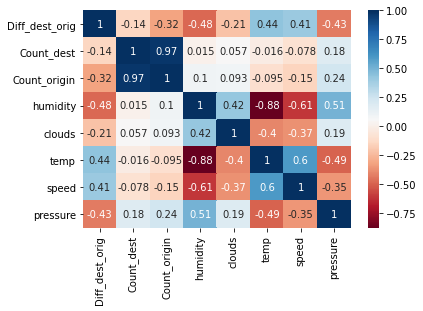

In [67]:
# @title
df_wth = df_weather_bikebalance_id[['Diff_dest_orig','Count_dest','Count_origin']+ weather_cols_cont].dropna()
sns.heatmap(df_wth.corr(method='spearman'),cmap='RdBu', annot=True)

Borrow and return are negative correlated with humidity. Interesting that that the difference is higher negative correlated with humidity, then seems that there are no bikes available, maybe due to desorganization in the bike stations when it rains.

#### EDA: focus in ID 7 and difference check ins and check outs

In [68]:
#@title
df_final_id7=df_final[df_final['ID']==7]
#df_final_id7['Day']=df_final_id7['Date'].dt.day
df_final_id7['Month']=df_final_id7.index.month
df_final_id7['Year']=df_final_id7.index.year
df_final_id7['Hour']=df_final_id7.index.hour
df_final_id7['Dayname']=df_final_id7.index.day_name()
df_final_id7=df_final_id7.sort_index().reset_index() # import for the plot line
df_final_id7.head()

Date       ID  Count_dest  ...  Year  Hour   Dayname
0 2020-01-02 11:00:00 7.000000   14.000000  ...  2020    11  Thursday
1 2020-01-02 12:00:00 7.000000    7.000000  ...  2020    12  Thursday
2 2020-01-02 13:00:00 7.000000   12.000000  ...  2020    13  Thursday
3 2020-01-02 14:00:00 7.000000   13.000000  ...  2020    14  Thursday
4 2020-01-02 15:00:00 7.000000   15.000000  ...  2020    15  Thursday

[5 rows x 9 columns]

In [69]:
#@title
df_final_id7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            6345 non-null   datetime64[ns]
 1   ID              6345 non-null   float64       
 2   Count_dest      6345 non-null   float64       
 3   Count_origin    6345 non-null   float64       
 4   Diff_dest_orig  6345 non-null   float64       
 5   Month           6345 non-null   int64         
 6   Year            6345 non-null   int64         
 7   Hour            6345 non-null   int64         
 8   Dayname         6345 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 446.3+ KB


In [70]:
#@title
print("Count ID 7 over the time")
df1 = df_final_id7['Date'].dt.date.value_counts().sort_index().reset_index()
df1.columns = ['Date','Count']
fig = px.line(df1, y='Count', x ='Date')

fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                  buttons=list([
                      dict(count=1, label="1m", step="month", stepmode="backward"),
                      dict(count=6, label="6m", step="month", stepmode="backward"),
                      dict(count=1, label="YTD", step="year", stepmode="todate"),
                      dict(count=1, label="1y", step="year", stepmode="backward"),
                      dict(step="all")
                              ])
                          )
                      )
fig.show()

Count ID 7 over the time


In [71]:
#@title
print("Diff_dest_orig over the time - ID 7")
fig = px.line(df_final_id7, x ='Date', y='Diff_dest_orig')

fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                  buttons=list([
                      dict(count=1, label="1m", step="month", stepmode="backward"),
                      dict(count=6, label="6m", step="month", stepmode="backward"),
                      dict(count=1, label="YTD", step="year", stepmode="todate"),
                      dict(count=1, label="1y", step="year", stepmode="backward"),
                      dict(step="all")
                              ])
                          )
                      )
fig.show()

Diff_dest_orig over the time - ID 7


In [72]:
#@title
print("Diff_dest_orig over the years - ID 7")
df1 = df_final_id7.groupby('Year').Diff_dest_orig.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Diff_dest_orig', x ='Year')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Diff_dest_orig over the years - ID 7


In [73]:
#@title
print("Diff_dest_orig over the months - ID 7")
df1 = df_final_id7.groupby('Month').Diff_dest_orig.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Diff_dest_orig', x ='Month')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Diff_dest_orig over the months - ID 7


In [74]:
#@title
print("Diff_dest_orig over the week days - ID 7")
df1 = df_final_id7.groupby('Dayname').Diff_dest_orig.median().sort_index().reset_index()
df_final_id7_cop=df_final_id7.copy()
df_final_id7_cop['Dayname'] = pd.Categorical(df_final_id7_cop['Dayname'], ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
df_final_id7_cop=df_final_id7_cop.sort_values('Dayname')
fig = px.box(df_final_id7_cop, y='Diff_dest_orig', x ='Dayname')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Diff_dest_orig over the week days - ID 7


In [75]:
#@title
print("Diff_dest_orig over the hours - ID 7")
df1 = df_final_id7.groupby('Hour').Diff_dest_orig.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Diff_dest_orig', x ='Hour')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Diff_dest_orig over the hours - ID 7


#### EDA: focus in ID 7 and analysis for the checkins numbers

In [76]:
#@title
print("Count_origin over the time - ID 7")
fig = px.line(df_final_id7, x ='Date', y='Count_origin')

fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                  buttons=list([
                      dict(count=1, label="1m", step="month", stepmode="backward"),
                      dict(count=6, label="6m", step="month", stepmode="backward"),
                      dict(count=1, label="YTD", step="year", stepmode="todate"),
                      dict(count=1, label="1y", step="year", stepmode="backward"),
                      dict(step="all")
                              ])
                          )
                      )
fig.show()

Count_origin over the time - ID 7


In [77]:
#@title
print("Count_origin over the year - ID 7")
df1 = df_final_id7.groupby('Year').Count_origin.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Count_origin', x ='Year')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_origin over the year - ID 7


In [78]:
#@title
print("Count_origin over the month - ID 7")
df1 = df_final_id7.groupby('Month').Count_origin.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Count_origin', x ='Month')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_origin over the month - ID 7


In [79]:
#@title
print("Count_origin over the week days - ID 7")
df1 = df_final_id7.groupby('Dayname').Count_origin.median().sort_index().reset_index()
df_final_id7_cop=df_final_id7.copy()
df_final_id7_cop['Dayname'] = pd.Categorical(df_final_id7_cop['Dayname'], ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
df_final_id7_cop=df_final_id7_cop.sort_values('Dayname')
fig = px.box(df_final_id7_cop, y='Count_origin', x ='Dayname')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_origin over the week days - ID 7


In [80]:
#@title
print("Count_origin over the hours - ID 7")
df1 = df_final_id7.groupby('Hour').Count_origin.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Count_origin', x ='Hour')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_origin over the hours - ID 7


In [81]:
#@title
print("Count_origin over the hours - ID 7")
df1 = df_final_id7.groupby('Hour').Count_origin.median().sort_index().reset_index()
fig = px.line(df1, y='Count_origin', x ='Hour')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_origin over the hours - ID 7


#### EDA: focus in ID 7 and analysis for the checkout numbers

In [82]:
#@title
print("Count_dest over the time - ID 7")
fig = px.line(df_final_id7, x ='Date', y='Count_dest')

fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                  buttons=list([
                      dict(count=1, label="1m", step="month", stepmode="backward"),
                      dict(count=6, label="6m", step="month", stepmode="backward"),
                      dict(count=1, label="YTD", step="year", stepmode="todate"),
                      dict(count=1, label="1y", step="year", stepmode="backward"),
                      dict(step="all")
                              ])
                          )
                      )
fig.show()

Count_dest over the time - ID 7


In [83]:
#@title
print("Count_dest over the year - ID 7")
df1 = df_final_id7.groupby('Year').Count_dest.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Count_dest', x ='Year')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_dest over the year - ID 7


In [84]:
#@title
print("Count_dest over the month - ID 7")
df1 = df_final_id7.groupby('Month').Diff_dest_orig.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Diff_dest_orig', x ='Month')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_dest over the month - ID 7


In [85]:
#@title
print("Count_dest over the dayweek - ID 7")
df1 = df_final_id7.groupby('Dayname').Count_dest.median().sort_index().reset_index()
df_final_id7_cop=df_final_id7.copy()
df_final_id7_cop['Dayname'] = pd.Categorical(df_final_id7_cop['Dayname'], ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
df_final_id7_cop=df_final_id7_cop.sort_values('Dayname')
fig = px.box(df_final_id7_cop, y='Count_dest', x ='Dayname')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_dest over the dayweek - ID 7


In [86]:
#@title
print("Count_dest over the hour - ID 7")
df1 = df_final_id7.groupby('Hour').Count_dest.median().sort_index().reset_index()
fig = px.box(df_final_id7, y='Count_dest', x ='Hour')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_dest over the hour - ID 7


In [87]:
#@title
print("Count_dest over the hour - ID 7")
df1 = df_final_id7.groupby('Hour').Count_dest.median().sort_index().reset_index()
fig = px.line(df1, y='Count_dest', x ='Hour')
  
fig.update_xaxes(rangeslider_visible=True,)
fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)
fig.show()

Count_dest over the hour - ID 7


#### EDA: focus in ID 7 - autocorrelation and particorrelation when sampled at a hourly level

In [88]:
df_final_id7.set_index("Date", inplace=True)

**DISCUSSION** when an hour is missing we impute 0, because there are no check ins neither check outs.


In [89]:
#@title
df_h = df_final_id7["Diff_dest_orig"].resample('1H').mean().to_frame()
df_h['Diff_dest_orig']=df_h['Diff_dest_orig'].fillna(0) # if there is no hour means that there are no check-ins and no checkouts then it is zero
display(df_h.head())
df_h.isna().sum()

Diff_dest_orig
Date                               
2020-01-02 11:00:00       -3.000000
2020-01-02 12:00:00        0.000000
2020-01-02 13:00:00        0.000000
2020-01-02 14:00:00       -1.000000
2020-01-02 15:00:00        4.000000

Diff_dest_orig    0
dtype: int64

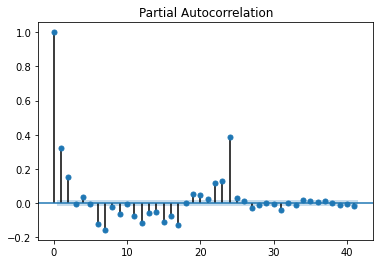

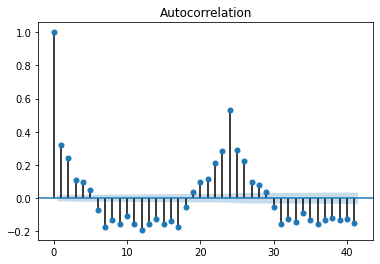

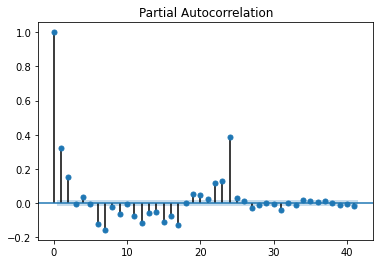

In [90]:
#@title
plot_acf(df_h["Diff_dest_orig"], alpha=.05)
plot_pacf(df_h["Diff_dest_orig"], alpha=.05)

#### EDA: focus in ID 7 - autocorrelation and particorrelation when sampled at a daily level

In [91]:
#@title
df_d = df_final_id7["Diff_dest_orig"].resample('1D').mean().to_frame()
df_d['Diff_dest_orig']=df_d['Diff_dest_orig'].fillna(0)
display(df_d.head())
df_d.isna().sum()

Diff_dest_orig
Date                      
2020-01-02        3.166667
2020-01-03        0.315789
2020-01-04       -0.176471
2020-01-05        0.000000
2020-01-06        0.000000

Diff_dest_orig    0
dtype: int64

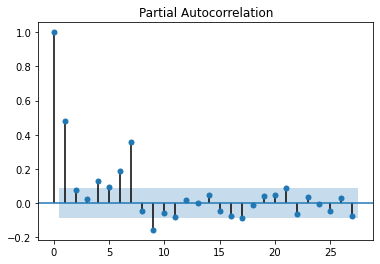

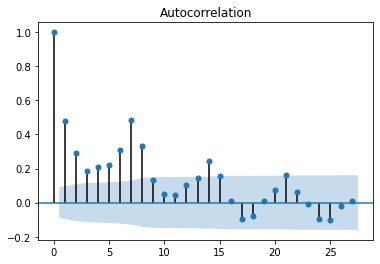

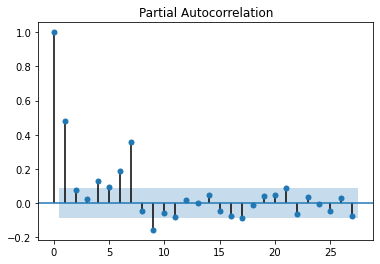

In [92]:
#@title
plot_acf(df_d, alpha=.05)
plot_pacf(df_d, alpha=.05)

#### MODEL: our first dummy model in this model we predict the  difference of checkouts(returns back)-checkins (borrows)(for ID7 station)

Preparation:
* Remove incoherences -> ok
* By hour, difference between check out and check in
* Sensor ID 7



In [93]:
#@title
print("Diff_dest_orig over the time - ID 7")
fig = px.line(df_h, x =df_h.index, y='Diff_dest_orig')

fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                  buttons=list([
                      dict(count=1, label="1m", step="month", stepmode="backward"),
                      dict(count=6, label="6m", step="month", stepmode="backward"),
                      dict(count=1, label="YTD", step="year", stepmode="todate"),
                      dict(count=1, label="1y", step="year", stepmode="backward"),
                      dict(step="all")
                              ])
                          )
                      )
fig.show()

Diff_dest_orig over the time - ID 7


It seems the series is statinary (according to the Dickey-Fuller test bellow), but since there are negative values let's **shift of + 100**.

In [94]:
#@title
#df_h['log_Diff_dest_orig']=np.log(df_h['Diff_dest_orig']+100)
df_h['Diff_dest_orig']=df_h['Diff_dest_orig']+100


##### Dickey Fuller test for testing stationarity of the time series (focuse on ID7)

In [95]:
#@title
adfstat, pvalue, usedlag, nobs, critvalues, icbest = adfuller(df_h[['Diff_dest_orig']].squeeze())
print('Statistic: %0.02f' % adfstat)
print('pvalue:    %0.03f' % pvalue)

Statistic: -13.22
pvalue:    0.000


Dickey Fuller Test for testing if the time series is statinary Only if the p-value is below a critical size,  
We have statistical evidence to reject the unit root and then say that the time series is stationary p_value<0.05 is acceptable

##### AutoARIMA (focuse on ID7)

Train may 2020 to dec 2021, and test after jan 2021 -> AutoARIMA

We have tried AutoARIMA, but it crashes and then we decided to delete since the results were not promising.

##### Random Forest Regressor (ML model) (focuse on ID7)





We choose from 2020-09-01 00:00:00 to 2021-12-03 23:00:00 as our training (70%) and test set (30%)

In [96]:
#@title
df_h['Diff_dest_orig']=df_h['Diff_dest_orig']-100
df = df_h.loc['2020-09-01 00:00:00':'2021-03-31 23:00:00',:]
#parameters used in Random Forest
rf_reg_params = {'n_estimators':500,'max_depth':100,'min_samples_split':50,'min_samples_leaf':20,'random_state':0}
#Columns 
X_cols_cat = ['hour','weekday','holiday','is_weekend']
X_cols_cont = []
y_col = 'Diff_dest_orig'
#preprocessing
train_df = preprocess_ML(df,X_cols_cat,X_cols_cont, y_col)
#spliting
X_train, X_test, y_train, y_test, train_dts, test_dts = train_test_split(train_df,y_col,model_type='ml')
#regr = GradientBoostingRegressor(**rf_reg_params)
regr = RandomForestRegressor(**rf_reg_params)
regr.fit(X_train, y_train)
y_test_predict = regr.predict(X_test)
r2 = r2_score(y_test, y_test_predict)
mape = mean_absolute_error(y_test, y_test_predict)
print('The r2 error is : {}'.format(r2))
print('The mean_absolut_error is:{}'.format(mape))


The r2 error is : 0.47032146115252493
The mean_absolut_error is:3.205538515990542


In [97]:
#Figure of predicted test and real test
#@title
#plot test versus test predict
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test.index, y=y_test_predict,
                    mode='lines',
                    name='test_predict'))
fig.add_trace(go.Scatter(x=X_test.index, y=y_test,
                    mode='lines',
                    name='test'))


fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="test vs test_predict",
    xaxis_title="date",
    yaxis_title="intensity",
    #     autosize=False,
    #     width=500,
         height=500,
    )
fig.show()

##### Random Forest Regressor (ML model) for a group of stations 


We dont think its feasible to focus on all stations simultaneously. The Top 15 bike stations cover around 45% of the bike demand. Focusing on these stations will have a big impact on the bike balancing. 

In [98]:
#@title
ID_list = list(df_final.ID.unique())
ID_list1 = [2,3,8,12,66]
df_final_slice = df_final.loc['2020-09-01 00:00:00':'2021-03-31 23:00:00',:]

In [99]:
#@title
_df3 = df3.sort_values(by='sum_count', ascending=False)
cumsum_stations = _df3.sum_count.cumsum()
cdf_cumsum = cumsum_stations/cumsum_stations.max()
_df3.Id_Aparcamiento_Origen.astype(str).values
x_st = ['ID_'+ x for x in list(_df3.Id_Aparcamiento_Origen.astype(str).values)]
fig = px.bar(x=x_st[:15], y=cdf_cumsum[:15], title='Cumuluative Sum (Checkin/outs) per Bike Station')
fig.show()


In [100]:
#@title
ID_list_Top15 = df3.iloc[-15:].Id_Aparcamiento_Origen

In [101]:
# @title
import datetime as dt
import matplotlib.pyplot as plt
resample = '1h'
now = dt.datetime.now()
now_hour = dt.datetime(now.year, now.month, now.day,now.hour,0,0)
pred_dt_rg = pd.date_range(start= now_hour,end=now_hour+dt.timedelta(days=3), freq=resample)
hist_weather_df.datetime = pd.to_datetime(hist_weather_df.datetime)
forecast_weather_df.datetime = pd.to_datetime(forecast_weather_df.datetime)

In [102]:
#@title
df_h = pd.merge(df_h.reset_index(),hist_weather_df, how='left', right_on='datetime',left_on='Date')


In [103]:
#@title
model_predict_dict = {}
r2scores = {}
maescores = {}
rf_reg_params = {'n_estimators':100,'max_depth':100,'min_samples_split':50,'min_samples_leaf':20,'random_state':0}
plot_results = True
model_predict_ls = []
for id in ID_list_Top15:
  try:
    df_final_id=df_final_slice[df_final_slice['ID']==id]
    df_h = df_final_id["Diff_dest_orig"].resample('1H').mean().to_frame()
    df_h['Diff_dest_orig']=df_h['Diff_dest_orig'].fillna(0) # if there is no hour means that there are no check-ins and no checkouts then it is zero
    df_h = pd.merge(df_h.reset_index(),hist_weather_df, how='left', right_on='datetime',left_on='Date')
    #only include opening hours and days
    
    #Columns 
    X_cols_cat = ['hour','weekday','holiday','is_weekend']
    X_cols_cont = ['temp','clouds','humidity','speed']
    y_col = 'Diff_dest_orig'
     #preprocessing
    train_df = preprocess_ML(df_h,X_cols_cat,X_cols_cont, y_col, remove_closed_hours=False)
    train_df = train_df.dropna()
    #spliting
    X_train, X_test, y_train, y_test, train_dts, test_dts = train_test_split(train_df,y_col,model_type='ml')
    #regr = GradientBoostingRegressor(**rf_reg_params)
    regr = RandomForestRegressor(**rf_reg_params)
    regr.fit(X_train, y_train)
    y_test_predict = regr.predict(X_test)
    r2 = r2_score(y_test, y_test_predict)
    mape = mean_absolute_error(y_test, y_test_predict)
    r2scores[id] = r2

    dts = X_test.index
    model_predict_dict[id] = y_test_predict
    pred_df_id = pd.DataFrame(data=y_test_predict, index=dts,columns=[y_col])
    pred_df_id['ID'] = id
    model_predict_ls.append(pred_df_id)
    maescores[id] = mape
    print('The r2 error for station id {} is : {}'.format(id,r2))
    print('The mean_absolut_error for station id {} is:{}'.format(id,mape))
    #print('model_prediction for station id {} is:{}'.format(id, y_test_predict))
    #Figure of predicted test and real test
#@title
#plot test versus test predict
    if plot_results:
      fig = go.Figure()
      fig.add_trace(go.Scatter(x=X_test.index, y=y_test_predict,
                      mode='lines',
                      name='test_predict'))
      fig.add_trace(go.Scatter(x=X_test.index, y=y_test,
                      mode='lines',
                      name='test'))


      fig.update_xaxes(rangeslider_visible=True)
      fig.update_layout(
      title="test vs test_predict for id {}".format(id),
      xaxis_title="date",
      yaxis_title="intensity",
      #     autosize=False,
      #     width=500,
            height=500,
      )
      fig.show()



      #show feature importance
      sorted_idx = regr.feature_importances_.argsort()
      fig = px.bar(y=X_train.columns[sorted_idx][-10:], x=regr.feature_importances_[sorted_idx][-10:], orientation='h')

      fig.update_layout(
          title="Bikestation ID {}: Feature Importance Top 10".format(id),
          xaxis_title="Random Forest Feature Importance",
          yaxis_title="Feature",
              autosize=True
          )

      fig.show()
  except:
    pass

The r2 error for station id 39 is : 0.16344612215027654
The mean_absolut_error for station id 39 is:1.3056938312800925


The r2 error for station id 56 is : 0.1606770496904405
The mean_absolut_error for station id 56 is:1.6700581303285267


The r2 error for station id 41 is : -0.0018698066625444376
The mean_absolut_error for station id 41 is:0.008468564456335531


The r2 error for station id 5 is : 0.0
The mean_absolut_error for station id 5 is:0.17999999999999988


The r2 error for station id 66 is : 0.5536460386140403
The mean_absolut_error for station id 66 is:2.7454502365819926


The r2 error for station id 23 is : 0.3040644222353748
The mean_absolut_error for station id 23 is:2.0612484599144967


The r2 error for station id 36 is : 0.41952244201450817
The mean_absolut_error for station id 36 is:2.1099320911072286


The r2 error for station id 10 is : 0.20105442673360763
The mean_absolut_error for station id 10 is:1.3791596762363738


The r2 error for station id 67 is : 0.0815092691718009
The mean_absolut_error for station id 67 is:1.460182501335221


The r2 error for station id 1 is : 0.8558544162842897
The mean_absolut_error for station id 1 is:4.021153857670849


The r2 error for station id 2 is : 0.030236532793481707
The mean_absolut_error for station id 2 is:2.47854929615095


The r2 error for station id 3 is : 0.2916042708244799
The mean_absolut_error for station id 3 is:2.1414461666976243


The r2 error for station id 12 is : 0.7689483026042845
The mean_absolut_error for station id 12 is:3.0544601915642238


The r2 error for station id 7 is : 0.4597538071964954
The mean_absolut_error for station id 7 is:3.275323759381118


The r2 error for station id 8 is : 0.485894951032392
The mean_absolut_error for station id 8 is:3.261040126185884


In [104]:
#@title
print("metrics for the bikes stations")
df_r2scores = pd.DataFrame.from_dict(r2scores, orient='index',columns=['r2score'])
df_r2scores.sort_values(by='r2score',ascending=False, inplace=True)
df_r2scores.head(20)

metrics for the bikes stations


r2score
1   0.855854
12  0.768948
66  0.553646
8   0.485895
7   0.459754
36  0.419522
23  0.304064
3   0.291604
10  0.201054
39  0.163446
56  0.160677
67  0.081509
2   0.030237
5   0.000000
41 -0.001870

##### Balance Map: 72 hours ahead prediction

In [105]:
#@title
pred_df = pd.concat(model_predict_ls,axis=0)
pred_df_f = pred_df[pred_df.ID.isin(df_r2scores[df_r2scores.r2score>0.3].index)].dropna()
dts_idx = pred_df_f[-24*3:].index
pred_df_f_72hrs = pred_df_f.loc[dts_idx]
display(pred_df_f_72hrs.head())
#join onto geodata
predictions_geo = pd.merge(pred_df_f_72hrs.reset_index(),df_bikestations_withids, how='left',on='ID')
predictions_geo['Date'] =predictions_geo['Date'].astype(str)

Diff_dest_orig  ID
Date                                   
2021-03-28 15:00:00       -1.601193  66
2021-03-28 15:00:00       -0.566816  23
2021-03-28 15:00:00        1.561462  36
2021-03-28 15:00:00        3.216340   1
2021-03-28 15:00:00        1.129267  12

In [106]:
#@title
print("Balance Map")
predictions_geo['size'] = 5
fig = px.scatter_mapbox(predictions_geo, lat="lat", lon="lon", center={'lon':-75.58,'lat':6.23},zoom=11,
                        color="Diff_dest_orig",color_continuous_scale=['blue','green','yellow'],
                        range_color =(-10,10),mapbox_style='carto-positron',
                       size ='size',animation_frame="Date",animation_group='ID')

fig.update_traces(opacity=1.0)
fig.update_layout(title="demand")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 1000
fig.layout.coloraxis.showscale = True
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10            

fig.show()

Balance Map


As a sample we chose the stations with ids (2,3,8,12,66) to predict the difference between borrow/return.
**When we see yellows and blue, we propose a movements of bycicle between them.**

A traffic light system to identify transfer between stations:

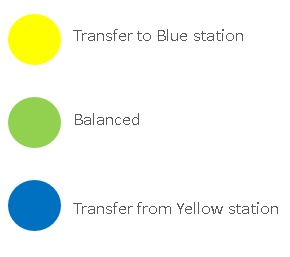

##### Bike sharing demand: find problematic strategy along a year and assumptions


Strategy to understand the problematic station over a time period of almost a year.

We consider the station as problematic if during the time we consider it has one of this types of problem **(-1: we have more borrow demand but there is not enough bikes in the station and 1: which account for the case we have return demand but there is not enough space in the station, 0: no problem)** in **more than 50%** of the time. 

**The strategy** we will do the following assumptions:

1. for our analysis we consider the date from 2020-03-1 00:00:00' to '2021-04-20 10:00:00' which is our training data.

2. we assume that the bikes will transfer once a day at night between stations and in each morning the number of bikes will be for automatic 40% of the num_slots and for manuals about 100.

3. we assume that the max capacity of the manual stations can not exceed 200 bikes and the max capacity of the automatic stations can be the number of slots.


In [108]:
#@title
max_manual_num_sloths = int(200)
df_id_numsloths_ismanual = df_bikestations_withids_gdf.loc[:,['ID','numSlots','isManual']]
df_final_merge = pd.merge(df_final,df_id_numsloths_ismanual,on = 'ID',right_index = True)
df_final_merge_slice = df_final_merge.loc['2020-03-1 00:00:00':'2021-04-20 10:00:00',:]
df_final_merge_slice.index = pd.to_datetime(df_final_merge_slice.index)
#df_final_merge_slice = df_final_merge_slice.resample('1H').sum().fillna(0)
#Id Lists
ID_list = list(df_final_merge_slice.ID.unique())
#df = df_final_merge.copy()
df1 = []
for id in ID_list: 
    num_slots = df_final_merge_slice.loc[df_final_merge_slice.ID ==id,'numSlots'][0]
    df = df_final_merge_slice.loc[df_final_merge_slice.ID==id,:]
    df.index = pd.to_datetime(df.index)
    df.sort_index()
    DFList = []
    for group in df.groupby(df.index.day):
        DFList.append(group[1])
    for i in range(0,len(DFList)):
        df2 = DFList[i]
        df2['Problematic_stations'] = 0
        df2['comsum'] = df.Diff_dest_orig.cumsum()
        if df2['isManual'].iloc[0] == 0:
           df2['num_bike'] = 0.4*num_slots-df2['comsum']
        elif df2['isManual'].iloc[0] == 1:
             df2['num_bike'] = 0.5*num_slots-df2['comsum']
        df2['num_bike'] = df2['num_bike'].clip(lower = 0)
        if df2['isManual'].iloc[0] == 0:
           df2['num_bike'].where(df2['num_bike'] >= num_slots, num_slots, inplace=True)
        elif df2['isManual'].iloc[0]==1:
             df2['num_bike'].where(df2['num_bike'] < max_manual_num_sloths, max_manual_num_sloths, inplace=True)
        df2['temp'] = df2['num_bike'] + df2['Diff_dest_orig']
        mask_1 = (df2['temp'] > num_slots) 
        mask_2 = (df2['temp'] < 0)
        if df2['isManual'].iloc[0] == 0:
           df2['Problematic_stations'][mask_1] = 1
           df2['Problematic_stations'][mask_2] = -1
        elif df2['isManual'].iloc[0] == 1:
             df2['Problematic_stations'][mask_2] = -1
        df1.append(df2)
result = pd.concat(df1)
result = result.drop('temp', axis = 1) 



###### Percentage of type of problems for a group of stations

In [109]:
#@title
for id in ID_list:
  result_id = result.loc[result.ID==id,:]
  print('Percentage of prablematic/nonprablematic  for the station id = {} from 2020-03-03 05:00:00 to 2020-03-14 07:00:00 :\n{}'.format(id, result_id.Problematic_stations.value_counts()*100/result_id.shape[0]))


Percentage of prablematic/nonprablematic  for the station id = 104.0 from 2020-03-03 05:00:00 to 2020-03-14 07:00:00 :
0   58.120133
1   41.879867
Name: Problematic_stations, dtype: float64
Percentage of prablematic/nonprablematic  for the station id = 103.0 from 2020-03-03 05:00:00 to 2020-03-14 07:00:00 :
0   59.640523
1   40.359477
Name: Problematic_stations, dtype: float64
Percentage of prablematic/nonprablematic  for the station id = 109.0 from 2020-03-03 05:00:00 to 2020-03-14 07:00:00 :
0   58.733444
1   41.266556
Name: Problematic_stations, dtype: float64
Percentage of prablematic/nonprablematic  for the station id = 3.0 from 2020-03-03 05:00:00 to 2020-03-14 07:00:00 :
1   51.014260
0   48.985740
Name: Problematic_stations, dtype: float64
Percentage of prablematic/nonprablematic  for the station id = 6.0 from 2020-03-03 05:00:00 to 2020-03-14 07:00:00 :
 0   58.284024
-1   41.715976
Name: Problematic_stations, dtype: float64
Percentage of prablematic/nonprablematic  for the st

when we have high percentage in +1 and -1, the stations along the year were problematics and then with the balance map of the section before we hope to solve the problems.

## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.


In this challenge we aim to **improve the "balancing" of bike-sharing system**. It is an interesting optimisation problem where there need to be sufficient bicycles for people to borrow (check-in), as well as sufficient spaces for people to park their bicycles at the destination (check-out). We compared the number of borrowing requests (check-in) against the number of returns (check-out) and identified instances where there appear to be an inbalance, ie. where there are more borrowing requests than bike returns, or vice versa.

As there are no specific information on the quantity of bikes at each station, we made several assumptions and analysed results according to these assumptions. The difference between the number of returns (checkouts) and borrows (checkins) represents the number of bikes at a station (availability). We created two forecasting models to predict the availability of the bikes at a group of stations, and using results of these models, the business can strategise the best way to transfer the bikes between the stations in order to maximise both the borrow and return requests.

**By making it easier for people to borrow and return bikes, we can encourage more users to uptake bicycle sharing, and in turn reduce pollution caused by motor vehicles.**

[As read](https://use.metropolis.org/case-studies/encicla----sustainable-mobility-program ), when a citizen moves in car, it emits between 220 and 250 grams of dioxide of carbon into the atmosphere per kilometer travelled, while biking, it emits 16 grams in the same distance. If people have bikes available and cycle to work and/or to go to school (majority of the trips in Medellin [as read in here](https://use.metropolis.org/case-studies/encicla----sustainable-mobility-program)) the reduction of emission will be (235-16/235)*100 of 93% of emissions for each person.

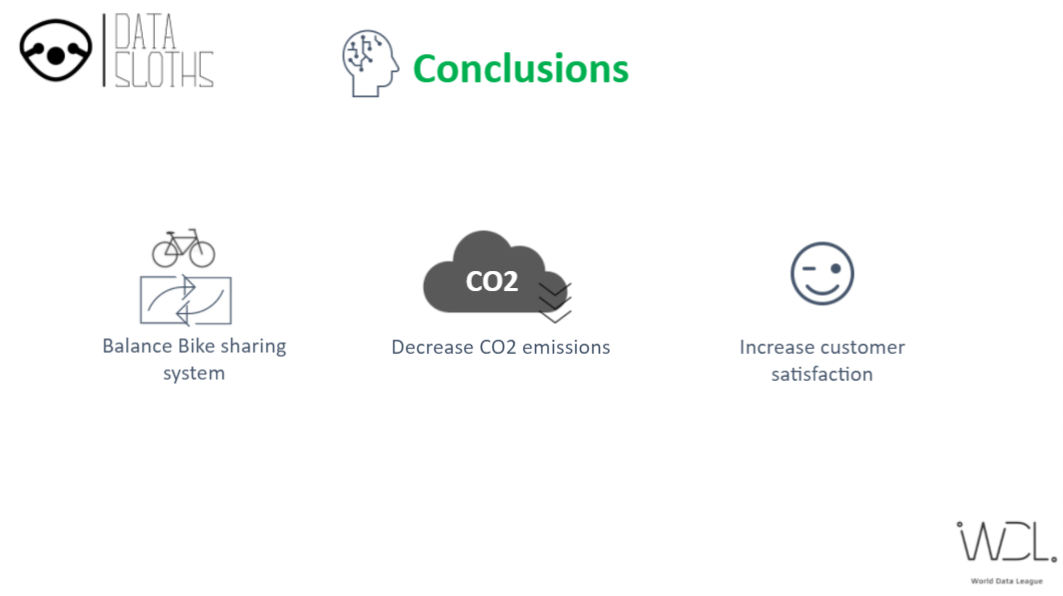




### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀

- We don’t have the capacity information at the start of each day and we notice that for sure there are some movements that aren’t registered in the data. We had to make some assumptions but they might not be correct.
- We suspect that the business already has a way of re-balancing the bikes but it is not clear to us, and this is also an unfamiliar territory for all of us
- We didn’t have time to consider the morphologic characteristics of the Medellin area, nor taking in consideration the number of metro or bus stations close by or even the hour of the services could help in understanding some peak of requests in certain times.
- Given more time, we would like to experiment with more granular samplng intervals, such as 15 mins resampling, which appears to be the median bike usage duration.
- It would be useful to forecast the borrowing and returning demands for the bike stations instead of forecasting their difference (bike availability) as we have done here
- It would also be useful to extract and incorporate Covid restriction dates and levels in Medellin into our model
- Given more time, we would like to incorporate the altitude of the stations and see the impact of the altitude on borrow/return demand
- We see that in the site there are [dashboards](https://encicla.metropol.gov.co/Paginas/Tableros.aspx) with information about the users (gender, profession), maybe could be integrated with as well external data from the censos of the metropolitan area
